<a href="https://colab.research.google.com/github/mohitsshetty986/Mini-Projects/blob/master/NewsArticle_Scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This program scrapes and summarizes news articles**



---


### To get news articles **NLP is involved**. So we will **pip install** few libraries

In [ ]:
pip install nltk

In [ ]:
pip install newspaper3k



---


### First we are going to **get the URLs of articles** from The Washington Post website in the following steps.

In [ ]:
import re, urllib.request
import numpy as np
from bs4 import BeautifulSoup

### We are using The Washington Post to get the **news articles**

In [ ]:
mainurl = 'http://www.washingtonpost.com/'

In [ ]:

html = urllib.request.urlopen(mainurl).read()
soup = BeautifulSoup(html)
links = soup.findAll("a")
t = set([ link["href"] for link in links if link.has_attr('href')])




---


### Now we will get the **lists of URLs** by executing the below step after removing few unnecessary elements that the **Beautiful Soup** library might have caught while capturing the URLs in the previous step.

In [ ]:
l=[]
for i in t:
  if i not in ['','#','./'] and i.find('www.washingtonpost.com')!=-1:
    l.append(i)

In [ ]:
print(l)

['https://www.washingtonpost.com/anonymous-news-tips/', 'https://www.washingtonpost.com/brand-studio/wp/2020/06/10/less-time-is-more/', 'https://www.washingtonpost.com/opinions/2020/08/24/i-was-doing-all-right-with-pandemic-then-my-tomatoes-started-dying/', 'https://www.washingtonpost.com/people/michelle-ye-hee-lee/', 'https://www.washingtonpost.com/blogs/post-live/', 'https://www.washingtonpost.com/graphics/2020/national/coronavirus-us-cases-deaths/', 'https://www.washingtonpost.com/entertainment/tv/what-to-watch-on-tuesday-trinkets-on-netflix/2020/08/21/d36b2b5a-e406-11ea-8181-606e603bb1c4_story.html', 'https://www.washingtonpost.com/sf/brand-connect/brand-studio/', 'https://www.washingtonpost.com/my-post/#/?tid=nav_acctmgnt_menu', 'https://www.washingtonpost.com/entertainment/comics/', 'https://www.washingtonpost.com/people/michelle-boorstein/', 'https://www.washingtonpost.com/outlook/2020/08/24/republicans-must-choose-are-they-party-ronald-reagan-or-donald-trump/', 'https://www.was



---


### We will use **newspaper3k** to automatically extract structured information. We can get the title, author, published date, text passage of article and more interestingly we can get a short summary of the article as well.
**Please check this [link](https://pypi.org/project/newspaper3k/) to know more about newspaper3k library**

Lets try it in out here.

In [ ]:
import nltk
from newspaper import Article

### We are going to **create a Dataframe** as it is more convinient to store the Article info in a tabular format

In [ ]:
import pandas as pd

df = pd.DataFrame()



---


### The first step in processing natural language is to convert the original text into tokens. A token is a combination of continuous characters, with some meaning, which a computer finds it hard to understand.

### **So we will download the [punkt](https://www.kite.com/python/docs/nltk.punkt) resource which is a tockenizer.**

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True



---


### We will filter out the urls from the list we got in above steps i.e. the urls without an author or publishing date, which means these urls are not articles. 

### So we will extract the article authors and publish date from the urls using **.download()** - to first download the article, **.parse()** - to get a syntactic structure of the article downloaded and then finally use **.nlp()** to get the summary of the article.


In [ ]:
list1=[]
list2=[]
for i in l:
  article = Article(i)
  try:
    article.download()
    article.parse()
    #article.nlp()
    if len(article.authors)!=0 and article.publish_date is not None:
      list1.append(article.title)
      list2.append(i)
  except:
    pass
df['Article Topic']=list1
df['Article URL']=list2



---


### After filtering is done, the **dataframe** is created.

In [ ]:
pd.set_option('max_colwidth', None)

df

,Article Topic,Article URL
0,Less (Time) Is More,https://www.washingtonpost.com/brand-studio/wp/2020/06/10/less-time-is-more/
1,I was doing all right with the pandemic. Then my tomatoes started dying.,https://www.washingtonpost.com/opinions/2020/08/24/i-was-doing-all-right-with-pandemic-then-my-tomatoes-started-dying/
2,What to watch on Tuesday: ‘Trinkets’ on Netflix,https://www.washingtonpost.com/entertainment/tv/what-to-watch-on-tuesday-trinkets-on-netflix/2020/08/21/d36b2b5a-e406-11ea-8181-606e603bb1c4_story.html
3,Republicans must choose: Are they the party of Ronald Reagan or Donald Trump?,https://www.washingtonpost.com/outlook/2020/08/24/republicans-must-choose-are-they-party-ronald-reagan-or-donald-trump/
4,A new book showcases 30 years of work supported by the Alexia Foundation,https://www.washingtonpost.com/photography/2020/08/24/thirty-years-these-grants-have-been-helping-photographers-produce-searing-images-social-injustice/
5,Here are 13 of the week’s best photos,https://www.washingtonpost.com/graphics/photography/2020/08/21/here-are-13-weeks-best-photos/
6,"Zoom went down for hours, disrupting schools and businesses",https://www.washingtonpost.com/business/2020/08/24/zoom-outages-monday/
7,Why German researchers held a large indoor concert during the pandemic,https://www.washingtonpost.com/world/2020/08/24/why-german-researchers-held-large-indoor-concert-during-pandemic/
8,People want to support their local bookstores. They might be hurting them instead.,https://www.washingtonpost.com/arts-entertainment/2020/08/23/people-want-support-their-local-bookstores-they-might-be-hurting-them-instead/
9,Live updates: Florida judge blocks order requiring in-person learning during coronavirus pandemic,https://www.washingtonpost.com/nation/2020/08/25/coronavirus-covid-live-updates-us/#link-2T4IYHJQHREZXE3BKBIRAD3TOI


In [ ]:
print("There are total",len(df.index),"articles available")

There are total 125 articles available




---


**We will get the list of all the articles we fetched from the Washington post site** 

### We have the article titles below

### Open the code in Google Colab or Jupyter and the below list will be properly displayed there.
Here in github the alignment of article topic and the corresponding index numbers is not proper. 

In [ ]:
pd.set_option('display.max_rows', 500)
list6=df.index
df.index=df['Article Topic']
df['index']=list6
df['index']

Article Topic
Less (Time) Is More                                                                                                                               0
I was doing all right with the pandemic. Then my tomatoes started dying.                                                                          1
What to watch on Tuesday: ‘Trinkets’ on Netflix                                                                                                   2
Republicans must choose: Are they the party of Ronald Reagan or Donald Trump?                                                                     3
A new book showcases 30 years of work supported by the Alexia Foundation                                                                          4
Here are 13 of the week’s best photos                                                                                                             5
Zoom went down for hours, disrupting schools and businesses                                       



---


### Input the **number from index column of above table** to get the article

In [ ]:
input1=int(input("Enter the article no. you would like to know about:"))

Enter the article no. you would like to know about:6




---


### We fetch the **url of the article index** you have selected from dataframe

In [ ]:
index1=df[df['index']==input1]['Article URL'].values
article=Article(list(index1)[0])



---


### Do some NLP to get the information for the article

In [ ]:
article.download()

article.parse()

article.nlp()



---


### Get the **title of article, author, published date**

In [ ]:
print("Article Title:")
print(article.title+"\n")
print("Author of the article:")
str1=''
for i in article.authors[:2]:
  str1+=i+', '
print(str1[:-2])
print("\n")
print("published Date:",article.publish_date.date())

Article Title:
Zoom went down for hours, disrupting schools and businesses

Author of the article:
Hamza Shaban, Technology Reporter


published Date: 2020-08-24




---


### Get a **summary** of the article

In [ ]:
summary=article.summary
summary=summary.replace('AD',' ')
print(summary)


Zoom first said it was experiencing partial outages on its status page, which it began investigating before 9 a.m. Eastern time.
And Microsoft reported in the spring that its communications platform Teams has 75 million daily active users.
 Atlanta Public Schools, which has more than 50,000 students, was set to start the school year virtually Monday, but struggled with Zoom problems.
All told, more than 100,000 K-12 schools use Zoom at no cost for online learning.
 “We have resolved an issue that caused some users to be unable to start and join Zoom Meetings and Webinars or manage aspects of their account on the Zoom website,” Zoom said.


In [ ]:
print("Want to check the article from the Washington Post website? Here's the URL:\n")

article.url

Want to check the article from the Washington Post website? Here's the URL:



'https://www.washingtonpost.com/business/2020/08/24/zoom-outages-monday/'



---


### **Get the Main image of the article**

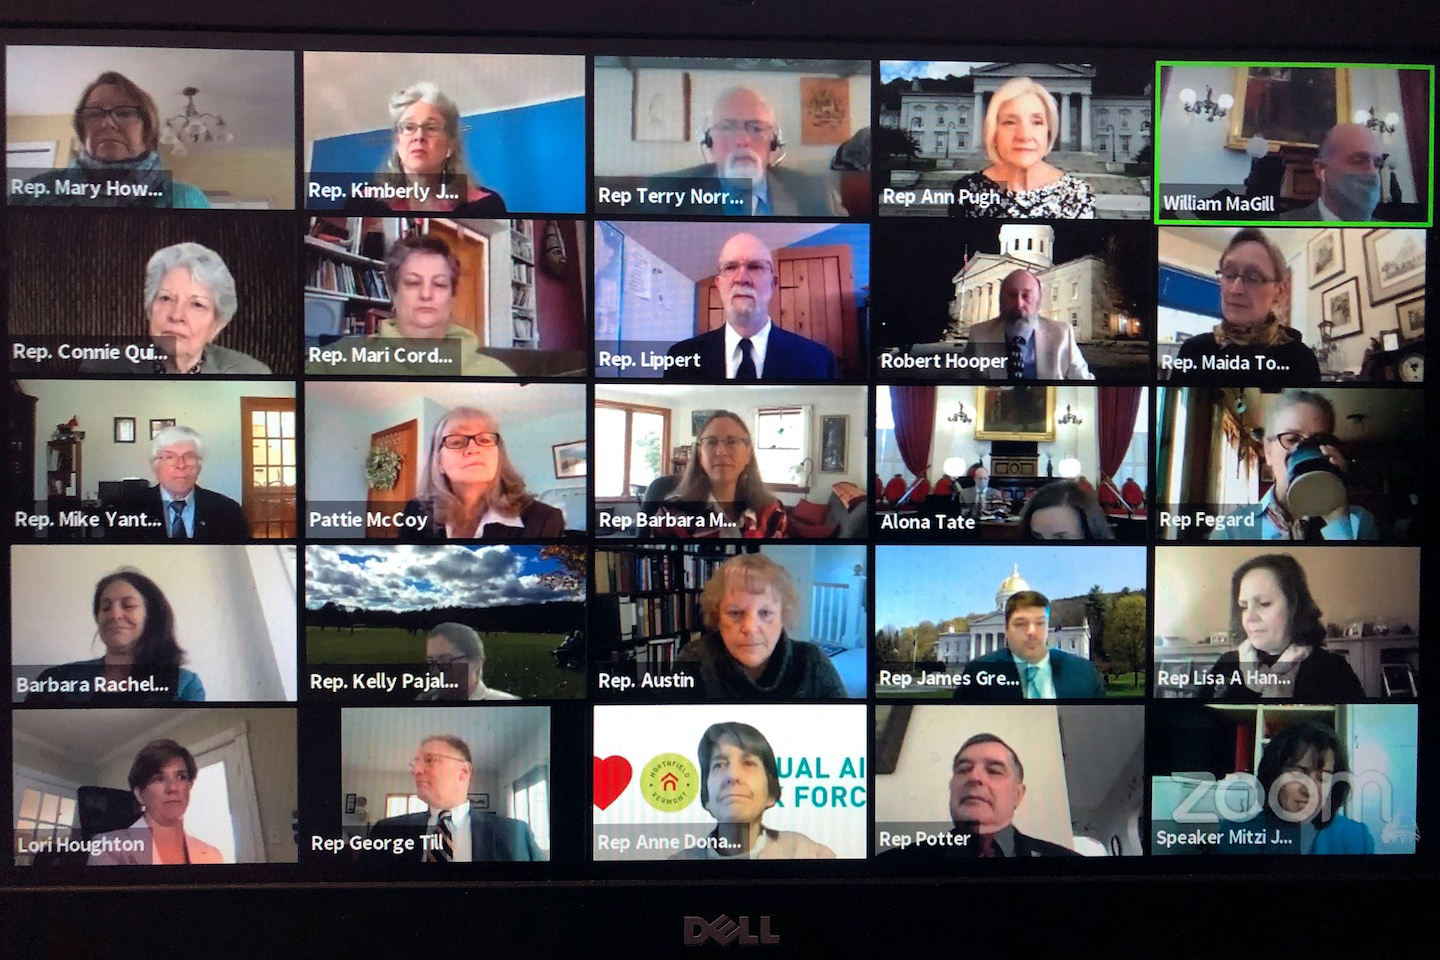

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

cap = cv2.VideoCapture(article.top_image)
ret, frame = cap.read()
cv2_imshow(frame)




---


### Get the **article paragraph**

In [ ]:
text= article.text
text=text.replace('AD\n','')
print(text)

Zoom first said it was experiencing partial outages on its status page, which it began investigating before 9 a.m. Eastern time. It’s unclear how many users were affected; clients in North America and parts of Europe have reported problems, according to the website Downdetector. The platform was back in working order by midday.


Zoom and other videoconferencing tools have become crucial during the public health crisis, a form of connection for business, school and social groups when face-to-face interactions are discouraged or prohibited because of the coronavirus. Its stock has more than tripled since the beginning of the year.


Zoom does not disclose the total number of daily active users on its service, a key metric that technology companies and analysts use to measure the size and growth of a platform. But the company reported in April that it has 300 million daily meeting participants, although people in multiple meetings could be counted more than once by that metric. By compar

### If you come accross a word you don't understand, we can get the meaning for you using a **Dictionary** Module named [PyDictionary](https://pypi.org/project/PyDictionary/).  

In [ ]:
pip install PyDictionary

In [ ]:
from PyDictionary import PyDictionary 
dictionary=PyDictionary() #This is will create a local instance of the PyDictionary class and now it can be used to get meanings

input1=input("Get the meaning of the word: ")
print("\n")
dictionary.meaning(input1)

Get the meaning of the word: inherent




{'Adjective': ['existing as an essential constituent or characteristic',
  'in the nature of something though not readily apparent']}

### If you want to listen to the text we can convert **text to speech** using **gTTS (Google Text-to-Speech) library**

In [ ]:
!pip install gTTS

In [ ]:
from gtts import gTTS

from IPython.display import Audio 

tts = gTTS(text) 
tts.save('1.wav') 
sound_file = '1.wav'
Audio(sound_file, autoplay=True) 